In [34]:
import pandas as pd
import seaborn as sns
from collections import defaultdict
import seaborn as sns

In [35]:
years = 20
rate = 0.05  # mean annual rate, e.g. VT ETF
dip_fee = 0  # DIP annual fee
contrib_emp = 48000  # employee contributions, max 48000
contrib_comp = 0  # employer contributions, max 50000
contrib = contrib_emp + contrib_comp
tax_rate = 0.15  # income tax rate
socsec_rate = 0.15  # social+healthcare tax rate (employee)
dip_tax_saving = contrib_emp * tax_rate + contrib_comp * (tax_rate + socsec_rate)
dps_state_contrib = 340 * 12
contrib_for_max_state_support = 1700
dps_tax_saving = (contrib_emp - 12 * contrib_for_max_state_support) * tax_rate + contrib_comp * (tax_rate + socsec_rate)
etf_ter = 0.001

In [36]:
res = defaultdict(list)
dip = 0
fees = 0
etf_dip_tax = 0
fees_etf_dip_tax = 0
etf_dps_tax = 0
fees_etf_dps_tax = 0
etf = 0  # benchmark
etf_fees = 0
dps = 0  # doplnkove penzijni sporeni, benchmark
dps_fees = 0

for year in range(1, years + 1):
    dip = (dip + contrib) * (1 + rate)
    fee = dip * (dip_fee + etf_ter)
    dip -= fee
    fees += fee
    res["dip"].append(dip)
    res["fees"].append(fees)

    etf_dip_tax = (etf_dip_tax + dip_tax_saving) * (1 + rate)
    fee = etf_dip_tax * etf_ter
    etf_dip_tax -= fee
    fees_etf_dip_tax += fee
    res["etf_dip_tax"].append(etf_dip_tax)
    res["fees_etf_dip_tax"].append(fees_etf_dip_tax)
    
    etf = (etf + contrib) * (1 + rate)
    fee = etf * etf_ter
    etf_fees += fee
    etf -= fee
    res["etf"].append(etf)
    res["etf_fees"].append(etf_fees)
    
    dps = (dps + contrib + dps_state_contrib) * (1 + rate)
    fee = dps * (0.015 + etf_ter)  # on average DSP costs 1.5% annually
    dps -= fee
    dps_fees += fee
    res["dps"].append(dps)
    res["dps_fees"].append(dps_fees)

    etf_dps_tax = (etf_dps_tax + dps_tax_saving) * (1 + rate)
    fee = etf_dps_tax * etf_ter
    etf_dps_tax -= fee
    fees_etf_dps_tax += fee
    res["etf_dps_tax"].append(etf_dps_tax)
    res["fees_etf_dps_tax"].append(fees_etf_dps_tax)

res = pd.DataFrame(res)
res["dps_reinvest"] = res.dps + res.etf_dps_tax
res["dps_reinvest_fees"] = res.dps_fees + res.fees_etf_dps_tax
res["dip_reinvest"] = res.dip + res.etf_dip_tax
res["dip_reinvest_fees"] = res.fees + res.fees_etf_dip_tax
res

,dip,fees,etf_dip_tax,fees_etf_dip_tax,etf,etf_fees,dps,dps_fees,etf_dps_tax,fees_etf_dps_tax,dps_reinvest,dps_reinvest_fees,dip_reinvest,dip_reinvest_fees
0,5.034960e+04,50.400000,7552.440000,7.560000,5.034960e+04,50.400000,5.380906e+04,874.944000,4342.653000,4.347000,5.815171e+04,879.291000,5.790204e+04,57.960000
1,1.031638e+05,153.667080,15474.571938,23.050062,1.031638e+05,153.667080,1.094046e+05,2653.880141,8897.878864,13.253786,1.183025e+05,2667.133926,1.186384e+05,176.717142
2,1.585633e+05,312.389084,23784.492234,46.858363,1.585633e+05,312.389084,1.668459e+05,5366.820961,13676.083035,26.943558,1.805219e+05,5393.764520,1.823478e+05,359.247446
3,2.166746e+05,529.280529,32501.183129,79.392079,2.166746e+05,529.280529,2.261942e+05,9044.775417,18688.180299,45.650446,2.448824e+05,9090.425863,2.491757e+05,608.672609
4,2.776304e+05,807.188811,41644.556043,121.078322,2.776304e+05,807.188811,2.875129e+05,13719.781961,23945.619725,69.620035,3.114585e+05,13789.401996,3.192749e+05,928.267133
5,3.415700e+05,1149.100703,51235.497062,172.365106,3.415700e+05,1149.100703,3.508674e+05,19424.942722,29460.410810,99.109936,3.803278e+05,19524.052658,3.928055e+05,1321.465809
6,4.086394e+05,1558.149183,61295.914643,233.722377,4.086394e+05,1558.149183,4.163252e+05,26194.458821,35245.150920,134.390367,4.515704e+05,26328.849188,4.699353e+05,1791.871560
7,4.789919e+05,2037.620585,71848.789665,305.643088,4.789919e+05,2037.620585,4.839563e+05,34063.666854,41313.054057,175.744775,5.252693e+05,34239.411629,5.508407e+05,2343.263673
8,5.527882e+05,2590.962113,82918.227919,388.644317,5.527882e+05,2590.962113,5.538327e+05,43069.076593,47677.981053,223.470482,6.015107e+05,43292.547075,6.357064e+05,2979.606430
9,6.301968e+05,3221.789708,94529.515175,483.268456,6.301968e+05,3221.789708,6.260290e+05,53248.409936,54354.471226,277.879362,6.803835e+05,53526.289298,7.247263e+05,3705.058165


<Axes: >

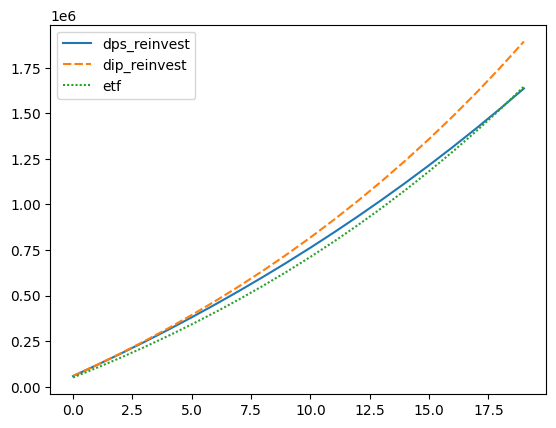

In [37]:
sns.lineplot(res[["dps_reinvest", "dip_reinvest", "etf"]])

<Axes: >

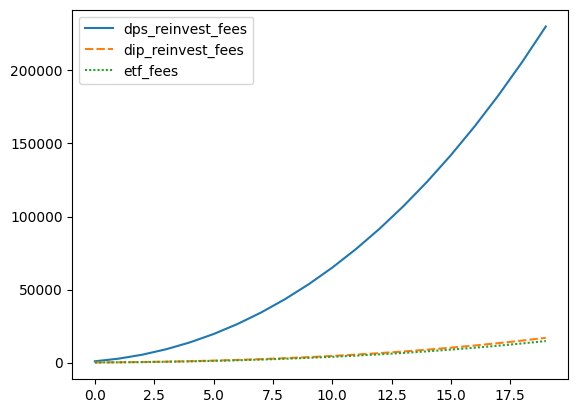

In [38]:
sns.lineplot(res[["dps_reinvest_fees", "dip_reinvest_fees", "etf_fees"]])

In [39]:
pd.options.display.max_colwidth = 200
res[["etf", "dps_reinvest", "dip_reinvest"]].tail(1)

,etf,dps_reinvest,dip_reinvest
19,1.646502e+06,1.635877e+06,1.893477e+06
